# Data Preprocessing for All Software Engineering and Related Jobs

In [323]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('jobs_dataset.csv')
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


## The Dataset as a Whole
Unnecessary data columns are dropped from the dataframe. In addition, since we
are looking at software engineering jobs in the US only, we must filter out the 
jobs that are from other countries.
<br>
<br>
According to the Levels.fyi dataset, the median total yearly compensation for 
software engineers and the like in the US is around $200,000. In terms of total
comp, the data seems to be reasonable, since there are no outragously high/low 
salaries at either extreme. 

In [324]:

# Dictionary might be useful later
states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}
df = df[['company', 'totalyearlycompensation', 'location',
        'yearsofexperience', 'basesalary', 'stockgrantvalue', 'bonus']]

# Location strings with only one comma are typially US cities. Typical format 
# of the string is "City", "Providence/State", "Country (if not US)"
df = df[df['location'].str.count(',') <= 1]
states_abbr = df['location'].str.slice(start=-2)
df['state'] = states_abbr
# Final round of filtering based on US states
df = df[df.state.isin(states) == True]
df = df.reset_index(drop=True)
df.describe()


,totalyearlycompensation,yearsofexperience,basesalary,stockgrantvalue,bonus
count,5.283800e+04,52838.000000,5.283800e+04,5.283800e+04,52838.000000
mean,2.353990e+05,7.242381,1.475904e+05,5.700785e+04,20977.710052
std,1.376608e+05,5.954670,5.741240e+04,8.639879e+04,27987.917410
min,1.100000e+04,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.530000e+05,3.000000,1.200000e+05,0.000000e+00,2000.000000
50%,2.000000e+05,6.000000,1.470000e+05,2.900000e+04,15000.000000
75%,2.800000e+05,10.000000,1.750000e+05,7.500000e+04,29000.000000
max,4.980000e+06,69.000000,1.659870e+06,2.800000e+06,1000000.000000


# Statistics By State
According to the bar chart, most tech jobs come from California, which makes 
sense. Following California is Washington State. From the bar graph, we can 
hypothesize that most tech jobs are concentrated in the few tech hubs of the US.

<Axes: xlabel='State', ylabel='Number of Jobs'>

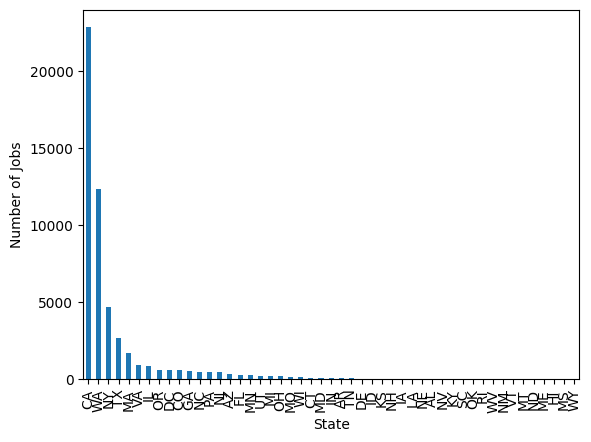

In [325]:
df.state.value_counts().plot(kind='bar', xlabel='State', 
                             ylabel='Number of Jobs')

# Aggregate Data
The following code below takes in the previous dataframe and condenses it into 50 entries, 1 for each state. Each state entry contains information such as median and average salary, median yoe, number of listings and the most common company that shows up within that state. Might have to drop NaN states later.

In [326]:
states3 = [
    'AK',
    'AL',
    'AR',
    'AZ',
    'CA',
    'CO',
    'CT',
    'DC',
    'DE',
    'FL',
    'GA',
    'HI',
    'IA',
    'ID',
    'IL',
    'IN',
    'KS',
    'KY',
    'LA',
    'MA',
    'MD',
    'ME',
    'MI',
    'MN',
    'MO',
    'MS',
    'MT',
    'NC',
    'ND',
    'NE',
    'NH',
    'NJ',
    'NM',
    'NV',
    'NY',
    'OH',
    'OK',
    'OR',
    'PA',
    'RI',
    'SC',
    'SD',
    'TN',
    'TX',
    'UT',
    'VA',
    'VT',
    'WA',
    'WI',
    'WV',
    'WY'
]

dfStates = pd.DataFrame(states3, columns = ['State'])
#dfStates['medianSalary'] = {}
#dfStates['averageSalary'] = {}
#dfStates['listings'] = {}
#dfStates['yearsofexperience'] = {}
#dfStates['commonCompany'] = {}
#dfStates['medianstockval'] = {}

#set up 50 entries with State names
#dfStates['State'] = {0}

#Run 50 loops for each state
#Create a dummy dataframe for each state that's a copy of the larger df
#drop all entires that aren't of the current state being analyzed by the forloop
#look at the data and combine it (ie look for medians of a column, averages, etc)

#df = df[df['state'] == 'WA']
#mode = df.mode()
#print(mode.head())
#mode = mode['company'].item()
#print(mode)
#test = mode
#print(test)

#df = df.dropna()

for i in range(50):
    dfDummy = pd.DataFrame()
    dfDummy = df[df['state'] == states3[i]]

    yoe = dfDummy['yearsofexperience'].median()
    dfStates.at[i, 'yearsofexperience'] = yoe

    listings = dfDummy.shape[0]
    dfStates.at[i, 'listings'] = listings

    salaryMedian = dfDummy['basesalary'].median()
    dfStates.at[i, 'medianSalary'] = salaryMedian

    salaryAvg = dfDummy['basesalary'].mean()
    dfStates.at[i, 'averageSalary'] = salaryAvg

    #print(filler.head(1))
    #mode = dfDummy['company'].mode().item()
    #mode = dfDummy['company'].mode()
    #mode = mode[0:1]
    #test = pd.Series(mode)
    #print(mode.head())
    #test = mode['company'].item()
    #test = str(mode.values[0])
    #print(test[0])

    #print(mode.head())
    #print(dfDummy.mode().item())
    #test = mode['company'].loc[mode.index[0]]
    #print(mode)
    
    mode = df[df['state'] == states3[i]].mode()
    if not mode.empty:
        mode = mode.dropna()
        #print(mode.head())
        test = mode['company'].item()
        dfStates.at[i, 'commonCompany'] = test

    #medianStock = dfDummy['stockgrantvalue'].median()
    #dfStates.at[i, 'medianstockval'] = medianStock
    #this can show stock value, but I'm not sure how useful that will be (a lot of states have 0)

print(dfStates.head(50))


  State  yearsofexperience  listings  medianSalary  averageSalary  \
0    AK                NaN       0.0           NaN            NaN   
1    AL                5.0      25.0      110000.0  109120.000000   
2    AR                5.0      88.0      100000.0  104454.545455   
3    AZ                5.0     379.0      112000.0  113055.408971   
4    CA                6.0   22824.0      160000.0  161392.882054   
5    CO                6.0     590.0      130000.0  128785.593220   
6    CT                6.0     106.0      109000.0  115047.169811   
7    DC                5.0     592.0      130000.0  131646.959459   
8    DE                5.0      59.0      103000.0  107576.271186   
9    FL                6.0     298.0      112000.0  117117.449664   

        commonCompany  
0                 NaN  
1               Shipt  
2        Walmart Labs  
3               Intel  
4              Google  
5              Google  
6             FactSet  
7         Capital One  
8      JPMorgan Chase  
